<a href="https://colab.research.google.com/github/gambal2/PSMDSProjects/blob/main/People_Analytics_5Factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset

In [ ]:
df = pd.read_csv("/drive/MyDrive/Notebooks/TIP-BIA/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data Preparocessing

In [ ]:
#Converting Categorical Data to Numerical
inputs = df.drop(['left'], axis='columns')
output = df['left']

In [ ]:
#labeling Categorical Values
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_Dept = LabelEncoder()
le_sal = LabelEncoder()

In [ ]:
inputs['Departments '] = le_Dept.fit_transform(inputs['Departments '])
inputs['salary']= le_Dept.fit_transform(inputs['salary'])
inputs['salary'] = inputs['salary'].astype('float')
inputs['Departments '] = inputs['Departments '].astype('float')
inputs

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,7.0,1.0
1,0.80,0.86,5,262,6,0,0,7.0,2.0
2,0.11,0.88,7,272,4,0,0,7.0,2.0
3,0.72,0.87,5,223,5,0,0,7.0,1.0
4,0.37,0.52,2,159,3,0,0,7.0,1.0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8.0,1.0
14995,0.37,0.48,2,160,3,0,0,8.0,1.0
14996,0.37,0.53,2,143,3,0,0,8.0,1.0
14997,0.11,0.96,6,280,4,0,0,8.0,1.0


# Split Train and Test Values

In [ ]:
#Use Catboost for Categorical Features
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
import seaborn as sns
import catboost
print('catboost version:', catboost.__version__)
from catboost import CatBoostClassifier 
from sklearn.model_selection import train_test_split

catboost version: 1.0.6


In [ ]:
# map categorical features
features = [feat for feat in list(df) 
            if feat != 'left']
print(features)

categorical_features = np.where(inputs[features].dtypes != np.float)[0]
X_train, X_test, y_train, y_test = train_test_split(inputs[features], 
                                                    df[['left']], 
                                                    test_size=0.2, 
                                                     random_state=1)

params = {'iterations':5000,
        'learning_rate':0.01,
        'cat_features':categorical_features,
        'depth':3,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': 1
          }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True  
         );

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Departments ', 'salary']


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9599545	best: 0.9599545 (0)	total: 64.9ms	remaining: 5m 24s
200:	test: 0.9856077	best: 0.9856077 (200)	total: 2.11s	remaining: 50.4s
400:	test: 0.9907407	best: 0.9907468 (399)	total: 6.32s	remaining: 1m 12s
600:	test: 0.9918835	best: 0.9918835 (600)	total: 12.2s	remaining: 1m 29s
800:	test: 0.9922527	best: 0.9922607 (798)	total: 19.4s	remaining: 1m 41s
1000:	test: 0.9927004	best: 0.9927034 (998)	total: 27.2s	remaining: 1m 48s
1200:	test: 0.9929494	best: 0.9929530 (1194)	total: 36.2s	remaining: 1m 54s
1400:	test: 0.9931916	best: 0.9931916 (1400)	total: 41.5s	remaining: 1m 46s
1600:	test: 0.9933609	best: 0.9933701 (1590)	total: 43.7s	remaining: 1m 32s
1800:	test: 0.9935080	best: 0.9935178 (1791)	total: 46s	remaining: 1m 21s
2000:	test: 0.9936767	best: 0.9936791 (1996)	total: 48.2s	remaining: 1m 12s
2200:	test: 0.9937760	best: 0.9937815 (2181)	total: 50.5s	remaining: 1m 4s
2400:	test: 0.9939103	best: 0.9939103 (2400)	total: 53.1s	remaining: 57.5s
2600:	test: 0.9939772	best: 0.9

In [ ]:
categorical_features

array([2, 3, 4, 5, 6])

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 6.9 MB/s 


In [ ]:
import shap  # package used to calculate Shap values
# SHapley Additive exPlanations
# The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory. The feature values of a data instance act as players in a coalition. Shapley values tell us how to fairly distribute the "payout" (= the prediction) among the features. 

from catboost import CatBoostClassifier, Pool
shap_values = cat_model.get_feature_importance(Pool(X_test, label=y_test,cat_features=categorical_features) ,
                                               type="ShapValues")
 
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_test.iloc[0,:])

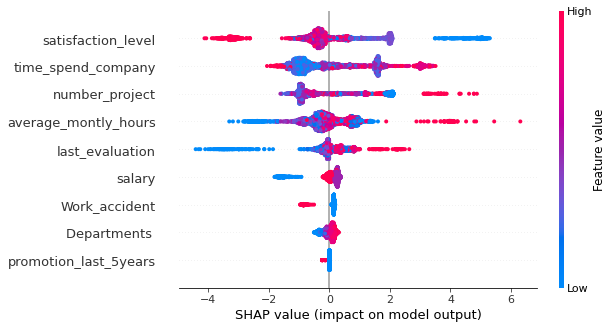

In [ ]:
shap.summary_plot(shap_values, X_test)

# Train Decision Tree Classifier

In [ ]:
X_train = X_train.iloc[:,0:5].values
X_test = X_test.iloc[:,0:5].values

In [ ]:
y_train = y_train['left'].values
y_test = y_test['left'].values

In [ ]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[6.80e-01 7.00e-01 4.00e+00 1.85e+02 4.00e+00]
 [4.50e-01 4.70e-01 2.00e+00 1.35e+02 3.00e+00]
 [7.00e-01 9.90e-01 5.00e+00 1.35e+02 4.00e+00]
 ...
 [1.10e-01 7.80e-01 7.00e+00 2.78e+02 4.00e+00]
 [8.30e-01 8.50e-01 4.00e+00 2.55e+02 5.00e+00]
 [7.50e-01 9.30e-01 3.00e+00 2.47e+02 2.00e+00]]
[0 1 0 ... 1 1 0]
[[6.70e-01 3.90e-01 2.00e+00 2.07e+02 7.00e+00]
 [5.10e-01 9.80e-01 4.00e+00 2.45e+02 3.00e+00]
 [6.60e-01 5.40e-01 2.00e+00 1.36e+02 2.00e+00]
 ...
 [8.30e-01 8.30e-01 4.00e+00 2.24e+02 4.00e+00]
 [2.00e-01 5.10e-01 2.00e+00 1.63e+02 2.00e+00]
 [7.30e-01 9.30e-01 3.00e+00 2.05e+02 3.00e+00]]
[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion ='entropy',max_depth=8,random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)

# Predict Test Set Results(Accuracy and Confusion matrix)

In [ ]:
y_pred = classifier.predict([[0.40,0.67,9,200,9]])
print(y_pred)

[1]


In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Precision Score : ',accuracy_score(y_test, y_pred))
print('Recall Score : ',recall_score(y_test, y_pred))
print('f1_score : ',f1_score(y_test, y_pred))

[[2273   14]
 [  53  660]]
Accuracy:  0.9776666666666667
Precision Score :  0.9776666666666667
Recall Score :  0.9256661991584852
f1_score :  0.9516943042537851


# Visualize Results

In [ ]:
inputs2 = df.drop(['left','Work_accident','promotion_last_5years','Departments ','salary'], axis='columns')
inputs2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3
...,...,...,...,...,...
14994,0.40,0.57,2,151,3
14995,0.37,0.48,2,160,3
14996,0.37,0.53,2,143,3
14997,0.11,0.96,6,280,4


In [ ]:
feature_names = [i for i  in inputs2.columns]
y_train_str = df.left.astype('str')
y_train_str[y_train_str=='0']="Stay"
y_train_str[y_train_str=='1']="Leave"
y_train_str2 = y_train_str.values
#y_train_str
#feature_names

In [ ]:
y_train_str2.value_counts()

AttributeError: ignored

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import graphviz

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree

In [ ]:
dot_data= tree.export_graphviz(classifier, out_file=None, feature_names= feature_names, class_names=['Stay','Leave'], filled=True, rounded= True, special_characters = True )

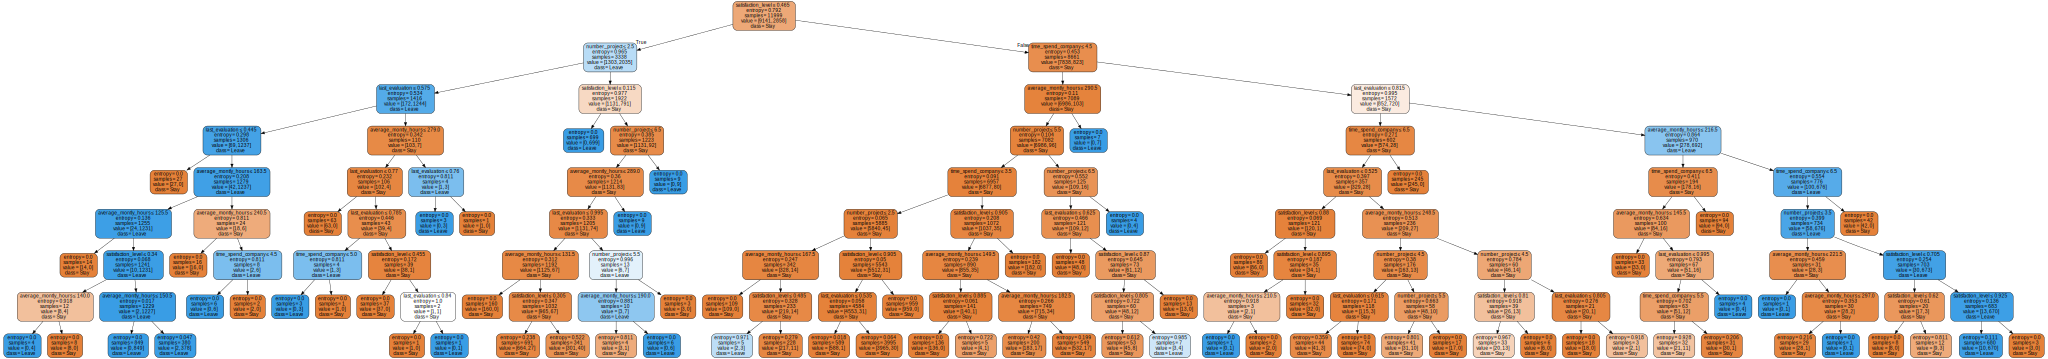

In [ ]:
graph = graphviz.Source(dot_data)
graph